# Usage

## Prerequisites

- Understand how matplotlib `Figure` and `Axes` work. [Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)

## What's in the package

- Colour: Python enum. [Available](colour.html#vis.colour.Colour)
- ColourScheme: Python enum, tuple of Colour. [Available](colour.html#vis.colour.ColourScheme)
- Visualisation helpers/wrappers. [API](plot.html)

## Example

In [23]:
import vis

### Univariate plot and scatter

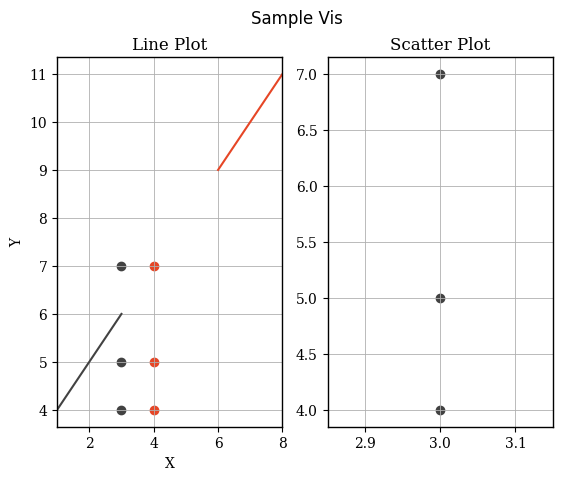

In [24]:
fig, (ax1, ax2) = vis.subplots(1, 2)

vis.uni_plot([1, 2, 3], [4, 5, 6], xlabel="X", ylabel="Y", ax=ax1)
vis.uni_plot([6, 7, 8], [9, 10, 11], ax=ax1)
vis.uni_scatter([3, 3, 3], [4, 5, 7], label="Points", ax=ax1)
vis.uni_scatter([4, 4, 4], [4, 5, 7], label="Points", ax=ax1)

vis.uni_scatter([3, 3, 3], [4, 5, 7], label="Points", ax=ax2)

ax1.set_title("Line Plot")
ax2.set_title("Scatter Plot")

fig.suptitle("Sample Vis")

vis.show()

- Warnings on overidding axis label

⚠️ [Fig 1] xlabel arg discarded


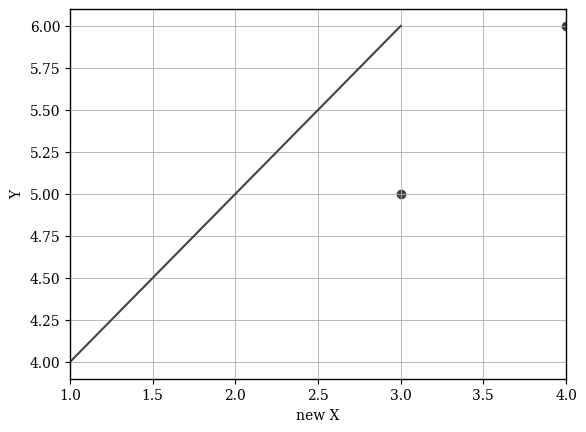

In [25]:
fig, ax = vis.uni_plot([1, 2, 3], [4, 5, 6], xlabel="X", ylabel="Y")

# This will warn that the xlabel of "X" is discarded
vis.uni_scatter([3, 4], [5,6], ax=ax, xlabel="new X")
vis.show()

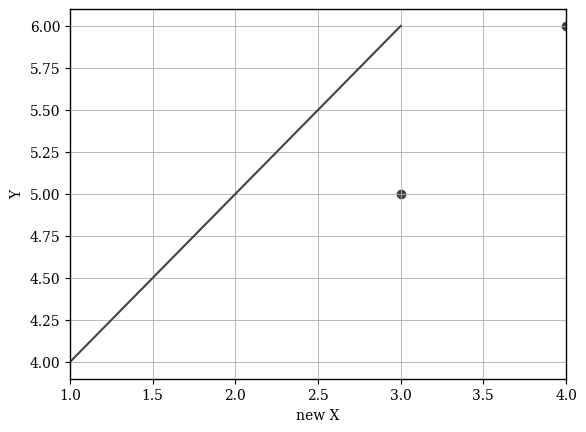

In [26]:
fig, ax = vis.uni_plot([1, 2, 3], [4, 5, 6], xlabel="X", ylabel="Y")

# This will NOT warn that the xlabel of "X" is discarded. Same goes for ylabel
vis.uni_scatter([3, 4], [5,6], ax=ax, xlabel="new X", xlab_override_warn=False)
vis.show()

### Dual axis

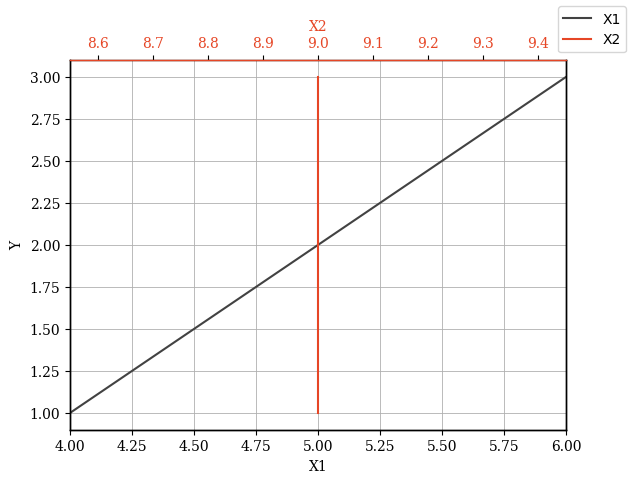

In [27]:
fig, ax = vis.dual_x_axis_plot(
    [1, 2, 3], ([4, 5, 6], [9, 9, 9]), xlabels=["X1", "X2"], ylabel="Y"
)
fig.legend(["X1", "X2"])
vis.show()

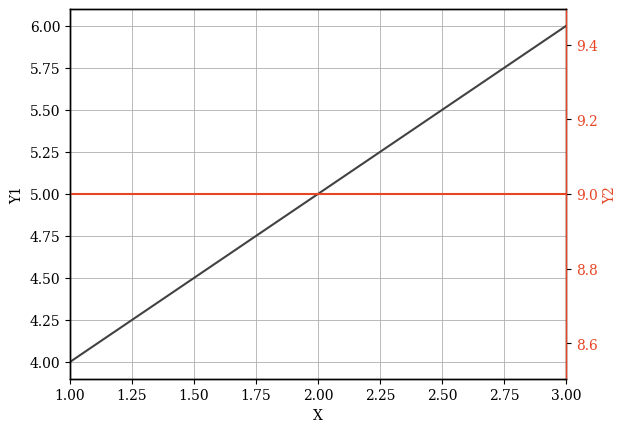

In [28]:
vis.dual_y_axis_plot(
    ([4, 5, 6], [9, 9, 9]), [1, 2, 3], xlabel="X", ylabels=["Y1", "Y2"]
)
vis.show()

## Tips

- Utilise the `fig` and `ax` return from the plotting functions.

- `get_axes_siblings_twin?()`
  - `twinx` mean 2 or more `Axes` sharing an x-axis (`dual_y_axis_plot()` uses this)
  - The `dual...()` only returns 1 `Axes`. The function will help get the other `Axes`

## Common issues

> `takes $x$ positional arguments but $>x$ positional arguments`

- Look at the function signature, anything after the `*` must be passed as `arg=value`

> Why is the styling not applied even though I used `uni_plot()`

- Check whether your `Axes`s and `Figure` are created with the right styling context. Use `vis.subplots()` instead of `plt.subplots()`, `ctx()` with `with` block or as decorator

> I want a permanent styling, apply directly onto `matplotlib`

- Use `style_init()`. `style_reset()` will bring back default styling

> Why scatter same colour as line?

- This is a limitation of `matplotlib`. The package provides `Colour` and `ColourScheme` for further customisation, our suggestion is to explicitly pass the `c` arg into `uni_plot()`, etc. 
- This snippet is a custom implementation to cycle the colours in **scatter**
  ```python
    def _next_colour_scatter(
        ax: plt.Axes | None, colour_scheme: tuple[str, ...], offset: int = 0
    ) -> str:
        """Get next colour from colour scheme with respect to amount of
        collections in `ax` and the offset.
        Offset is used when `ax.plot` has not been called but the `offset` colour is required
        Args:
            ax: Axes to plot on. If None, default to `colour_scheme[offset]`.
            colour_scheme: Colour scheme to use
            offset: Offset for `colour_scheme`
        """
        return (
            colour_scheme[(len(ax.collections) + offset) % len(colour_scheme)]
            if ax
            else colour_scheme[offset]
        )
  ```
- This snippet is a custom implementation to cycle the colours in **line**
  ```python
    def _next_colour_line_plot(
        ax: plt.Axes | None, colour_scheme: tuple[str, ...], offset: int = 0
    ) -> str:
        """Get next colour from colour scheme with respect to amount of
        lines in `ax` and the offset.
        Offset is used when `ax.plot` has not been called but the `offset` colour is required.
        Args:
            ax: Axes to plot on. If None, default to `colour_scheme[offset]`.
            colour_scheme: Colour scheme to use
            offset: Offset for `colour_scheme`
        """
        return (
            colour_scheme[(len(ax.lines) + offset) % len(colour_scheme)]
            if ax
            else colour_scheme[offset]
        )
  ```

> How to use enum

- `Colour.AccentBlue` won't get you the string. Use `Colour.AccentBlue.value`. Same goes for `ColourScheme`